<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/1_Intro_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [2]:
!pip install numpy
!pip install scikit-learn
!pip install keras
!pip install tensorflow
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install openml


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.33 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.10 requires numpy<2,>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.10 requires scikit-learn>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 33.4 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11782 sha256=2fd194136d514e4efb0e761567cb18c2eff67768cd57b972391a3f912d6e73c6
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5d\2a\9c\3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Cargar el dataset Pima Indians Diabetes desde OpenML
# y preparar los datos para un modelo de Keras.

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


def load_dataset_sklearn():
    """Carga el dataset Pima Indians Diabetes desde OpenML.
    - Convierte etiquetas a 0/1 (tested_positive -> 1).
    - Elimina filas con NaN.
    - Devuelve X_train, y_train, X_test, y_test en formato adecuado para Keras.
    """
    data = fetch_openml('diabetes', version=1, as_frame=False, parser='auto')
    X = data.data
    y = data.target

    if y.dtype == object or np.issubdtype(y.dtype, np.character):
        y = (y == 'tested_positive').astype(np.float64)
    else:
        y = y.astype(np.float64)

    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    X, y = X[mask], y[mask]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, y_train, X_test, y_test


# Cargar y normalizar los datos
train_images, train_labels, test_images, test_labels = load_dataset_sklearn()

mean = train_images.mean(axis=0, keepdims=True)
std = train_images.std(axis=0, keepdims=True) + 1e-8

train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

print("Formas de los conjuntos:", train_images.shape, test_images.shape)


Formas de los conjuntos: (614, 8) (154, 8)


In [4]:
# Verificar la forma de los datos de entrenamiento
train_images.shape

(614, 8)

In [5]:
# Verificar la forma de los datos de prueba
len(train_labels)

614

In [6]:
# Verificar los labels de entrenamiento
train_labels

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [7]:
# Verificar la forma de los datos de prueba
test_images.shape


(154, 8)

In [8]:
# Verificar los labels de prueba
len(test_labels)

154

Ejemplos de etiquetas de entrenamiento: [0. 1. 0. 0. 1. 0. 1. 1. 0. 0.]


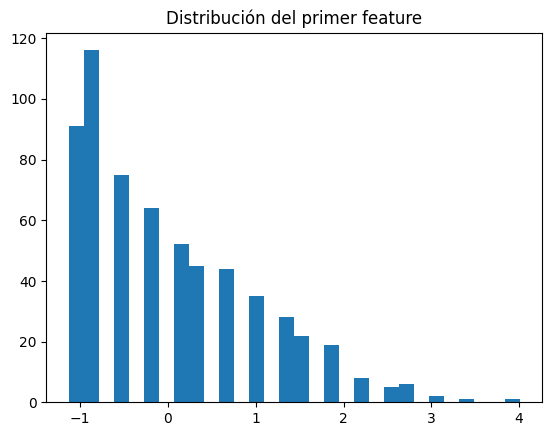

In [9]:
import matplotlib.pyplot as plt

# Verificar algunos labels de entrenamiento
print("Ejemplos de etiquetas de entrenamiento:", train_labels[:10])

# Visualizar la distribución del primer feature
plt.hist(train_images[:, 0], bins=30)
plt.title("Distribución del primer feature")
plt.show()



In [10]:
# Definir la arquitectura de la red neuronal
# Ahora para un problema de clasificación binaria (diabetes / no diabetes).

from keras import models
from keras import layers

# Crear la red neuronal
network = models.Sequential()

# Agregar capa oculta con la dimensión de entrada basada en los features
network.add(layers.Dense(16, activation='relu', input_shape=(train_images.shape[1],)))

# Capa de salida binaria
network.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Compilar la red neuronal
# Para clasificación binaria usamos binary_crossentropy

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [12]:
# Los datos ya están en forma (n_muestras, n_features) y normalizados
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
print("Formas finales de los datos:", train_images.shape, test_images.shape)

Formas finales de los datos: (614, 8) (154, 8)


In [13]:
print(test_labels.shape)

(154,)


In [14]:
# Para clasificación binaria mantenemos las etiquetas como 0/1 en float32
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')
print("Forma de las etiquetas de test:", test_labels.shape)

Forma de las etiquetas de test: (154,)


In [15]:
print("train_images:", train_images.shape, train_images.dtype)
print("train_labels:", train_labels.shape, train_labels.dtype)

train_images: (614, 8) float32
train_labels: (614,) float32


In [16]:
import time

t0 = time.time()
history = network.fit(train_images[:100], train_labels[:100],
                      epochs=1, batch_size=32, verbose=1)
print("Tiempo transcurrido:", time.time() - t0, "segundos")

4/4 [==============================] - 1s 3ms/step - loss: 0.7490 - accuracy: 0.6100
Tiempo transcurrido: 0.7182736396789551 segundos


In [17]:
import tensorflow as tf
print(tf.__version__)
print("Dispositivos:", tf.config.list_physical_devices())

2.12.0
Dispositivos: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [18]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5700
Epoch 2/5
5/5 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5928
Epoch 3/5
5/5 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6124
Epoch 4/5
5/5 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.6254
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6498


In [ ]:
# Gráficas: coste (loss) y accuracy durante el entrenamiento
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
epochs_range = range(1, len(history.history['loss']) + 1)

ax1.plot(epochs_range, history.history['loss'], 'b-o', markersize=4)
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss (coste)')
ax1.set_title('Coste en entrenamiento')
ax1.grid(True, alpha=0.3)

ax2.plot(epochs_range, history.history['accuracy'], 'g-s', markersize=4)
ax2.set_xlabel('Época')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy en entrenamiento')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

5/5 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.7013
test_acc: 0.701298713684082


## Tabla

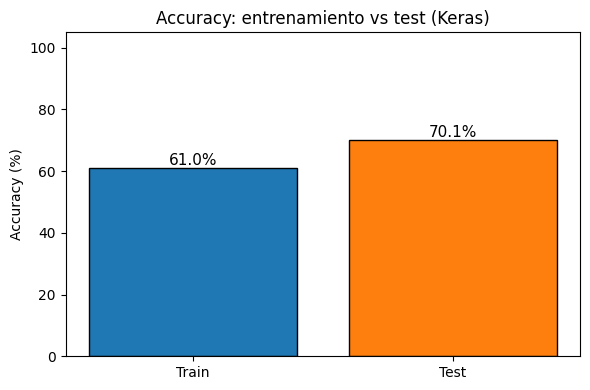

In [25]:
# Comparación accuracy entrenamiento vs test (como en Sigmoid vs Tanh)
train_acc_pct = history.history['accuracy'][-1] * 100
test_acc_pct = test_acc * 100

fig, ax = plt.subplots(figsize=(6, 4))
labels = ['Train', 'Test']
values = [train_acc_pct, test_acc_pct]
colors = ['#1f77b4', '#ff7f0e']
bars = ax.bar(labels, values, color=colors, edgecolor='black')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy: entrenamiento vs test (Keras)')
ax.set_ylim(0, 105)
for b in bars:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 1, f'{b.get_height():.1f}%', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

## Comparación con Sigmoid vs Tanh

Se comparan los resultados de esta red en Keras (1 capa oculta, más neuronas) con los **mejores** resultados del notebook implementado a mano (Sigmoid y Tanh por learning rate). Mismo dataset (Pima Indians Diabetes) y mismo tipo de problema (clasificación binaria).

,Modelo,Acc train %,Acc test %,Gap
0,"Keras (1 capa oculta, 16 u)",61.000000,70.130000,-9.130000
1,"Sigmoid (a mano, mejor LR)",77.040000,75.320000,1.720000
2,"Tanh (a mano, mejor LR)",75.730000,70.780000,4.950000


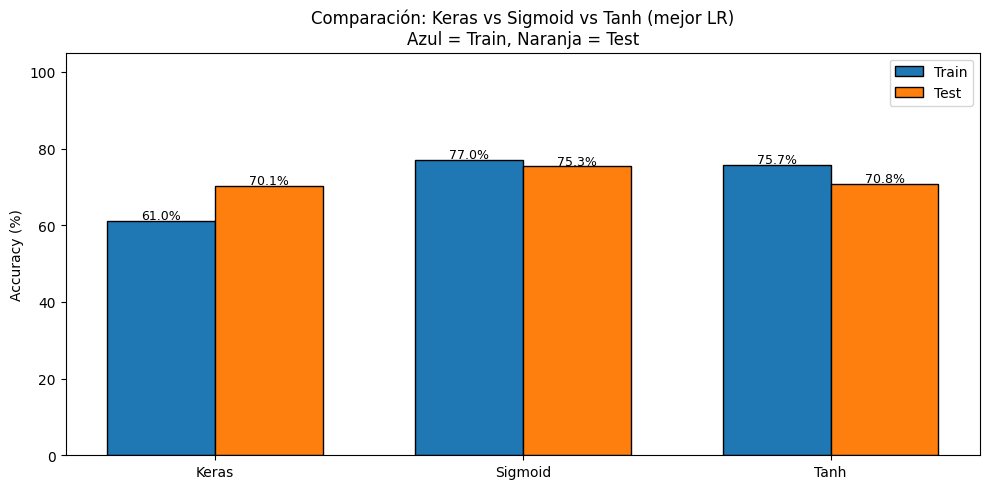

In [26]:
# Resultados de este notebook (Keras)
keras_train = history.history['accuracy'][-1] * 100
keras_test = test_acc * 100
keras_loss = history.history['loss'][-1]

# Valores de referencia del notebook Sigmoid_vs_Tanh (mejor LR por activación).
# Si ejecutaste ese notebook y obtuviste otros valores, actualiza aquí.
sig_train, sig_test = 77.04, 75.32   # Sigmoid mejor LR (ej. 0.1)
tanh_train, tanh_test = 75.73, 70.78  # Tanh mejor LR (ej. 0.1)

import pandas as pd
from IPython.display import display

# Tabla comparativa
df = pd.DataFrame({
    'Modelo': ['Keras (1 capa oculta, 16 u)', 'Sigmoid (a mano, mejor LR)', 'Tanh (a mano, mejor LR)'],
    'Acc train %': [round(keras_train, 2), sig_train, tanh_train],
    'Acc test %': [round(keras_test, 2), sig_test, tanh_test],
})
df['Gap'] = (df['Acc train %'] - df['Acc test %']).round(2)
display(df.style.set_caption('Comparación Keras vs Sigmoid vs Tanh').set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold')]},
    {'selector': 'th, td', 'props': [('text-align', 'center')]}
]))

# Gráfica de barras: accuracy train y test por modelo
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(3)
width = 0.35
bars1 = ax.bar(x - width/2, [keras_train, sig_train, tanh_train], width, label='Train', color='#1f77b4', edgecolor='black')
bars2 = ax.bar(x + width/2, [keras_test, sig_test, tanh_test], width, label='Test', color='#ff7f0e', edgecolor='black')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparación: Keras vs Sigmoid vs Tanh (mejor LR)\nAzul = Train, Naranja = Test')
ax.set_xticks(x)
ax.legend(loc='upper right')
ax.set_ylim(0, 105)
ax.set_xticklabels(['Keras', 'Sigmoid', 'Tanh'])
for b in bars1:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.5, f'{b.get_height():.1f}%', ha='center', fontsize=9)
for b in bars2:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.5, f'{b.get_height():.1f}%', ha='center', fontsize=9)
plt.tight_layout()
plt.show()